In [44]:
%matplotlib inline

In [13]:
#import gym modules
import gym

In [57]:
# import pytorch modules
import torch
import torch.nn as nn
import torch.optim as optim

In [47]:
# import time to slow down rendering speed
import time
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

In [61]:
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_cuda else torch.ByteTensor
Tensor = FloatTensor

In [15]:
# create gym env
env = gym.make('BreakoutDeterministic-v4')

In [45]:
# reset it to return to the starting frame
frame = env.reset()

# render
env.render()

# loop until done
# random agent
is_done = False
while not is_done:
    # Perform random action, return new frame, reward and whether the game is completed
    frame, reward, is_done, _ = env.step(env.action_space.sample())

    # render next frame
    env.render()

    # time.sleep()
        

In [ ]:
# def q_iteration(env, model, state, iteration, memory):
#     # select an epsilon for epsilon-greedy exploration vs exploitation
#     epsilon = get_epsilon(iteration)

In [59]:
class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)
        self.head = nn.Linear(448, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

In [62]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200

model = DQN()

if use_cuda:
    model.cuda()

optimizer = optim.RMSprop(model.parameters())
memory = ReplayMemory(10)

In [53]:
torch_frame = torch.FloatTensor(frame)

In [55]:
torch_frame


( 0 ,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0

( 1 ,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0

( 2 ,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0
... 

(207,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0

(208,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0

(209,.,.) = 
    0    0    0
    0    0    0
    0    0    0
       ⋮       
    0    0    0
    0    0    0
    0    0    0
[torch.FloatTensor of size 210x160x3]

In [2]:
def to_grayscale(img):
    """
    turns an image into a grayscale image
    """
    return np.mean(img, axis=2).astype(np.uint8)

In [6]:
def downsample(img):
    """
    downsamples an image by taking everyone second pixel
    """
    return img[::2, ::2]

In [5]:
def preprocess(img):
    """
    preprocesses the image with grayscale and downsampling
    """
    return to_grayscale(downsample(img))

In [7]:
def transform_reward(reward):
    """
    returns the sign of the reward, so that the learning agent can be used in multiple games
    """
    return np.sign(reward)

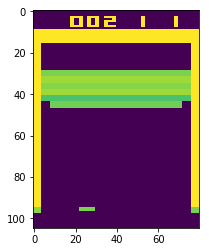

In [32]:
plt.imshow(preprocess(frame))

In [36]:
frame.shape

(210, 160, 3)

In [42]:
to_grayscale(frame)[100]

array([142, 142, 142, 142, 142, 142, 142, 142,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 142, 142, 142,
       142, 142, 142, 142], dtype=uint8)

In [49]:
(to_grayscale(frame)/255)[:100]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.55686275,  0.55686275,  0.55686275, ...,  0.55686275,
         0.55686275,  0.55686275],
       [ 0.55686275,  0.55686275,  0.55686275, ...,  0.55686275,
         0.55686275,  0.55686275],
       [ 0.55686275,  0.55686275,  0.55686275, ...,  0.55686275,
         0.55686275,  0.55686275]])

In [48]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)